In [1]:
#Importation des librairies
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kilia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
data_path = "../data/txt/"

In [6]:
#choisir une décénie
DECADE = '1880'

In [7]:
#créer une liste de textes de  tous les fichiers de la décénie 1880
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [8]:
# Exemple de fichiers
files[:5]

['KB_JB838_1887-12-22_01-00001.txt',
 'KB_JB838_1887-12-22_01-00002.txt',
 'KB_JB838_1887-12-22_01-00003.txt',
 'KB_JB838_1887-12-22_01-00004.txt',
 'KB_JB838_1887-12-22_01-00005.txt']

In [9]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [10]:
# Exemple de textes
texts[0][:400]

'ræge quotidien J00 EXEMPLAIRES distribués gratuitement ■ k . ‘ dans ilàgg;lomération bruxelloise et.en province. ï personnes habitant aux étages fenile journal contre 60 c“« par mois. fSpir est expédié en proyinôe contre t*»"par mois, payables par trimestre. annonces, faits divers et réclames sjont reçu frie d’Isabelle ; à l’AGENCE ROSSFJl. 44. -v , et do l’Enseignement, à BraxelL annonces remises'

## Vectoriser les documents à l'aide de TF-IDF

In [11]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [12]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [13]:
# Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`
tfidf_vectors = vectorizer.fit_transform(texts)

In [14]:
# Détail de la matrice
tfidf_vectors.shape

(236, 2751)

In [15]:
# Imprimer le vecteur tf-IDF du premier document
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

commis       0.173980
capitaine    0.147061
uno          0.147036
décembre     0.141962
langues      0.138614
               ...   
engager      0.000000
enlevé       0.000000
enquête      0.000000
ensemble     0.000000
juillet      0.000000
Length: 2751, dtype: float64

In [16]:
# Observer les distances entre quelques vecteurs de nos documents
tfidf_array = tfidf_vectors.toarray()

In [17]:
# Vecteur du document 0
tfidf_array[0]

array([0.        , 0.        , 0.02657873, ..., 0.        , 0.03803381,
       0.03604103])

In [18]:
# Vecteur du document 1
tfidf_array[1]

array([0.        , 0.        , 0.02161775, ..., 0.        , 0.03093471,
       0.        ])

In [19]:
# Vecteur du document 2
tfidf_array[2]

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.01069914])

In [20]:
# Vecteur du document 3
tfidf_array[3]

array([0.       , 0.0594173, 0.       , ..., 0.       , 0.       ,
       0.       ])

In [23]:
#Vecteur du document 4
tfidf_array[4]

array([0., 0., 0., ..., 0., 0., 0.])

In [42]:
#Vecteur du document 10
tfidf_array[10]

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
cosine(tfidf_array[0], tfidf_array[1])

0.7179300466038534

In [26]:
cosine(tfidf_array[2], tfidf_array[3])

0.9511133965333436

In [24]:
cosine(tfidf_array[2], tfidf_array[4])

0.9516946407070003

In [46]:
cosine(tfidf_array[2], tfidf_array[10])

0.9481768120995716

## Appliquer Un algorithme de Clustering sur les vecteurs TF-IDF des documents

In [47]:
#Définir un nombre de Clusterings 
N_CLUSTERS = 3

In [48]:
# Instancier le modèle K-Means et ses arguments
km_model = KMeans(n_clusters=N_CLUSTERS)

In [49]:
# Appliquer le clustering à l'aide de la fonction `fit_predict`

In [50]:
clusters = km_model.fit_predict(tfidf_vectors)

In [51]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [52]:
pprint(dict(clustering))

{0: ['KB_JB838_1887-12-22_01-00003.txt',
     'KB_JB838_1887-12-22_01-00006.txt',
     'KB_JB838_1887-12-25_01-00003.txt',
     'KB_JB838_1887-12-28_01-00003.txt',
     'KB_JB838_1887-12-29_01-00003.txt',
     'KB_JB838_1887-12-30_01-00003.txt',
     'KB_JB838_1887-12-31_01-00003.txt',
     'KB_JB838_1888-01-02_01-00003.txt',
     'KB_JB838_1888-05-18_01-00003.txt',
     'KB_JB838_1888-06-21_01-00003.txt',
     'KB_JB838_1888-06-30_01-00003.txt',
     'KB_JB838_1888-07-28_01-00003.txt',
     'KB_JB838_1888-09-08_01-00003.txt',
     'KB_JB838_1888-10-18_01-00003.txt',
     'KB_JB838_1888-10-28_01-00003.txt',
     'KB_JB838_1888-11-14_01-00003.txt',
     'KB_JB838_1888-11-21_01-00003.txt',
     'KB_JB838_1888-11-29_01-00003.txt',
     'KB_JB838_1889-02-07_01-00003.txt',
     'KB_JB838_1889-03-20_01-00003.txt',
     'KB_JB838_1889-06-07_01-00003.txt',
     'KB_JB838_1889-07-31_01-00003.txt'],
 1: ['KB_JB838_1887-12-22_01-00001.txt',
     'KB_JB838_1887-12-22_01-00002.txt',
     'KB_JB838_

## Visualiser les Clusters

In [53]:
# Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [54]:
reduced_vectors[:10]

array([[-0.23650836, -0.16865119],
       [-0.23385747, -0.19084201],
       [-0.2512002 ,  0.81912455],
       [ 0.23558554,  0.00096394],
       [ 0.15716509, -0.00993538],
       [-0.26228059,  0.81144278],
       [-0.22187818, -0.1721427 ],
       [-0.07704543, -0.00730792],
       [-0.23833334, -0.16995424],
       [-0.23331123, -0.15747134]])

## Générer un plot

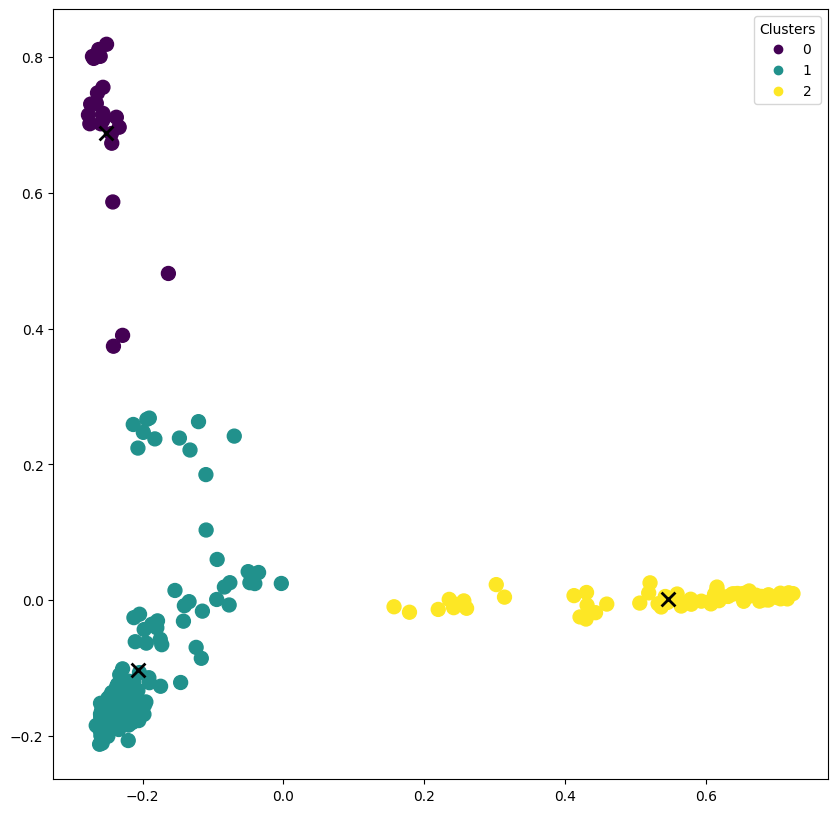

In [55]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

# Word Embeddings : le modèle Word2Vec

In [69]:
#Importation des librairies
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

## Chargement et traitement des phrases du corpus

In [70]:
# Création d'un objet qui *streame* les lignes d'un fichier pour économiser de la RAM
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [71]:
infile = f"../data/sents.txt"
sentences = MySentences(infile)

In [72]:
#Détection des bigrammes
bigram_phrases = Phrases(sentences)

In [60]:
type(bigram_phrases.vocab)

dict

In [73]:
#Afficher le nombre de termes (Clés) observés dans le corpus
len(bigram_phrases.vocab.keys())

15850647

In [74]:
#Prenons une Clé au hasard
key_ = list(bigram_phrases.vocab.keys())[1000]
print(key_)

eleves_de


In [75]:
bigram_phrases.vocab[key_]

794

In [76]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

### Extraction des trigrams

In [77]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [78]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

# Création d'un corpus d'unigrams, bigrams, trigrams

In [79]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [80]:
print(corpus[:100])

[['mi', 'imnri', 'r', 'i', '<<', 'i', 'i', 'hmu', "'", 'i', '/', 'tx', "-'", 'l', ':', 'marche', 'tenu', 'hors', 'villa', ',', 'la', '9', '.'], ['--', 'u', 'a', 'ete', 'vaain', 'si', 'teicj', '>>', 'm', 'races_indigenes', 'de', 'fr', '.'], ['31', '<)', 'a', '5s', "'", 'k', '131', 'de', '.'], ['rasa', 'iichakdui', "'", 'te', ',', 'do', '(', 'r', '.', '3s0', 'h', '710', '.', 'taureaux', 'iallsenas', ',>', 'ia', 'u', '\\', '--', 'a', '--', ';', '0ii', '.'], ['hollandais', ',', 'dufr', '.'], ['0', '.'], ['--', 'a', '9', '.--', 'la', 'idto', '-', 'vachei', 'laitieres', ':', 'bn', 'vante', '1q', '.'], ['vendues', '3', '\\', 'au', 'prix', 'la', '410', 'a', '*', '<<', 'i', 'h', '\\;', 'genisses', ',', 'kl', '.'], ["'.", '9', '.'], ['i', 'l', '.', '2', 'i', '.', 'id', '.'], ['da', '370', 'i', '6lutr', '.'], ['marche', 'a', '<', 'u', 'porcs', '.'], ['--', 'categorie', 'de', 'lt', 'ilashtya', ':', "'", '237', 'on', 'vente', ';', 'vendus', '1', 'm', '.', 'do', "'", '2', 'i', '.--', 'a', ';:,', 'l'

## Entrainement d'un modèle Word2Vec sur ce corpus

In [81]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=2, # La taille du "contexte", ici 2 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=2, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=4 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: total: 25min 27s
Wall time: 25min 5s


### Sauver le modèle dans un fichier

In [82]:
outfile = f"../data/newspapers.model"
model.save(outfile)

## Explorer le modèle

In [83]:
# Charger le modèle en mémoire
model = Word2Vec.load("../data/newspapers.model")

In [84]:
# Imprimer le vecteur d'un terme
model.wv["communaux"]

array([-0.9209766 , -1.5017217 ,  1.5979385 ,  0.10752422, -0.18113397,
       -0.82539576, -0.646485  ,  0.2082822 ,  0.6088267 ,  0.530898  ,
        0.59747946,  1.2978153 ,  0.83347315, -0.2896856 , -0.63917637,
        0.5967281 ,  0.23126213, -1.1107761 ,  0.60391045,  0.30877337,
       -0.04572865,  0.53204113,  1.4188472 ,  0.70988506,  0.1302041 ,
       -0.82007414,  0.12429668,  3.2156541 , -0.4484554 ,  0.13061294,
       -0.91744   , -0.42560613], dtype=float32)

 #Calculer la similarité entre deux termes

In [90]:
model.wv.similarity("douanes", "administration")

0.56447834

In [112]:
model.wv.similarity("professeur", "universite_libre")

0.42753115

In [93]:
model.wv.similarity("juridiction", "agents")

0.4299595

In [99]:
model.wv.similarity("canadienne", "ottawa")

0.42139554

In [114]:
model.wv.similarity("--;_pommes", "terre")

0.48257676

In [116]:
model.wv.similarity("langue", "litterature")

0.88409704

#chercher les mots les plus proches d'un terme donné

In [85]:
model.wv.most_similar("communaux", topn=10)

[('provinciaux', 0.9242786765098572),
 ('municipaux', 0.9069733023643494),
 ('federaux', 0.8990811705589294),
 ('militaires', 0.8883243799209595),
 ('nationaux', 0.8871442079544067),
 ('principaux', 0.8857815265655518),
 ('communales', 0.8853791952133179),
 ('publics', 0.8849593997001648),
 ('adjoints', 0.8818342089653015),
 ('regionaux', 0.8815510869026184)]

In [86]:
model.wv.most_similar("commercial", topn=10)

[('colonial', 0.8961623907089233),
 ('industriel', 0.8520947694778442),
 ('exclusif', 0.8425019383430481),
 ('financier', 0.8212165832519531),
 ('administratif', 0.8004991412162781),
 ('important', 0.7989554405212402),
 ('special', 0.7972767949104309),
 ('medical', 0.795788049697876),
 ('direct', 0.7834296226501465),
 ('professionnel', 0.7744525671005249)]

In [117]:
model.wv.most_similar("universite_libre", topn=10)

[('athenee_royal', 0.9291048645973206),
 ('association_liberale', 0.9264692068099976),
 ('athenee', 0.9137592911720276),
 ('universite', 0.8999341726303101),
 ('association_catholique', 0.8834546208381653),
 ('union_athletique', 0.878878653049469),
 ('ecole_normale', 0.8689125776290894),
 ('assistance_publique', 0.8634395003318787),
 ('orphelinat', 0.8629177808761597),
 ('administration_communale', 0.8599738478660583)]

In [97]:
model.wv.most_similar("canadienne", topn=10)

[('espagnole', 0.9188292622566223),
 ('portugaise', 0.9141632914543152),
 ('mexicaine', 0.9141112565994263),
 ('roumaine', 0.9073714017868042),
 ('grecque', 0.9068703651428223),
 ('italienne', 0.9053553938865662),
 ('egyptienne', 0.9028696417808533),
 ('polonaise', 0.8984108567237854),
 ('chinoise', 0.8911156058311462),
 ('francaise', 0.8870465159416199)]

In [94]:
# Faire des recherches complexes à travers l'espace vectoriel
print(model.wv.most_similar(positive=['douanes', 'belgique'], negative=['canadienne']))

[('provinces', 0.7682438492774963), ('legations', 0.7307987213134766), ('avoirs', 0.712346613407135), ('etrangers', 0.7115942239761353), ('provinciaux', 0.7114353775978088), ('souscriptions', 0.7036561369895935), ('deux_flandres', 0.6962061524391174), ('delegues', 0.6957635283470154), ('fonctionnaires', 0.6934096813201904), ('autrichiens', 0.6899731159210205)]


In [110]:
print(model.wv.most_similar(positive=['ottawa', 'namur'], negative=['ecole_militaire']))

[('grenoble', 0.777327835559845), ('douai', 0.7768574357032776), ('malines', 0.7553407549858093), ('perpignan', 0.7523889541625977), ('charleroi', 0.7503430843353271), ('roubaix', 0.7497711777687073), ('verriers', 0.7479147911071777), ('kleber_piot', 0.7457864880561829), ('toulon', 0.7454814910888672), ('jemappes', 0.7452989220619202)]


In [111]:
print(model.wv.most_similar(positive=['commercial', 'economie'], negative=['vente']))

[('intellectuel', 0.767174482345581), ('imperialisme', 0.7353477478027344), ('ammoniaque', 0.7075372338294983), ('colonial', 0.707362711429596), ('effectif', 0.7054851651191711), ('espagnol', 0.6976175904273987), ('enseignement_professionnel', 0.6972361207008362), ('episcopat', 0.692575216293335), ('allemand', 0.6869814991950989), ('armement', 0.6830693483352661)]
